<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [23]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [4]:
print(df['Industry'].unique())


[nan 'Healthcare' 'Software Development' 'Banking/Financial Services'
 'Other:' 'Media & Advertising Services' 'Insurance'
 'Internet, Telecomm or Information Services' 'Higher Education' 'Energy'
 'Fintech' 'Retail and Consumer Services' 'Manufacturing' 'Government'
 'Computer Systems Design and Services' 'Transportation, or Supply Chain']


In [5]:
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)


C:\Users\Imane\AppData\Local\Temp\ipykernel_39460\2707621394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = industry_counts.index, y = industry_counts.values, palette='Set1')


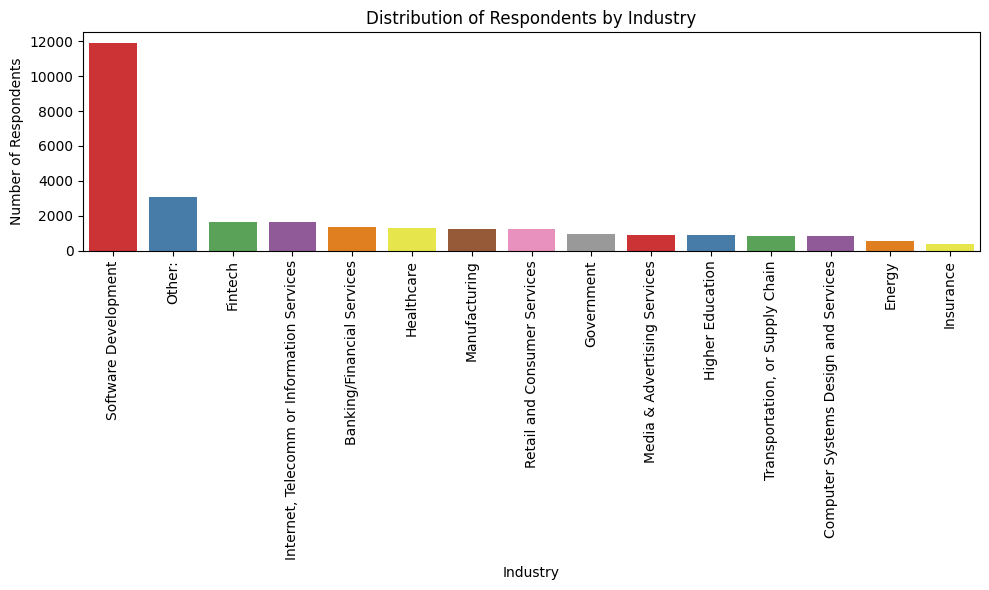

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x = industry_counts.index, y = industry_counts.values, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757
Outlier Threshold: 646,426.21
Number of high earners: 89


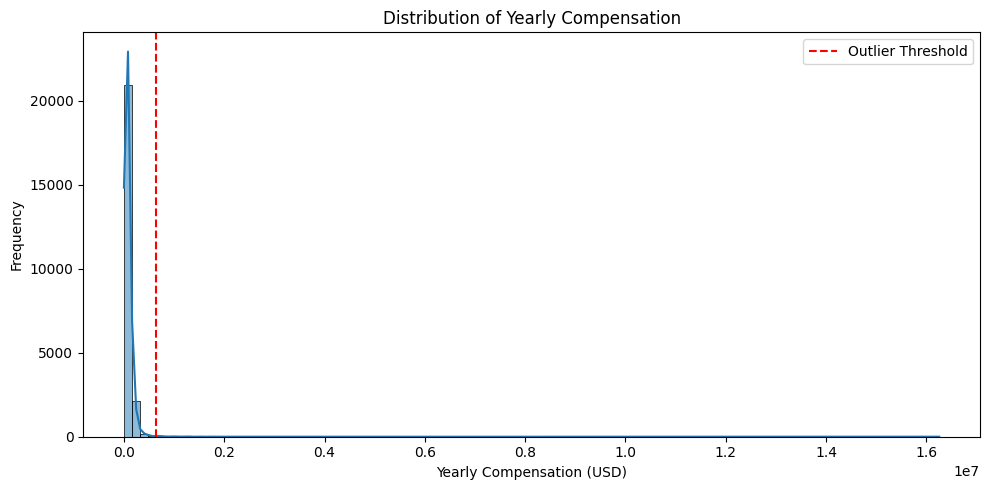

In [25]:
mean = df['ConvertedCompYearly'].mean()
median = df['ConvertedCompYearly'].median()
std_dev = df['ConvertedCompYearly'].std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")

threshold = mean + 3 * std_dev
print(f"Outlier Threshold: {threshold:,.2f}")

high_earners = df[df['ConvertedCompYearly'] > threshold]
print(f"Number of high earners: {len(high_earners)}")

plt.figure(figsize=(10, 5))
sns.histplot(df['ConvertedCompYearly'], bins=100, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Outlier Threshold')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Lower Bound: -80,177.25
Upper Bound: 220,860.75
Number of outliers using IQR method: 978


C:\Users\Imane\AppData\Local\Temp\ipykernel_39460\2278401103.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


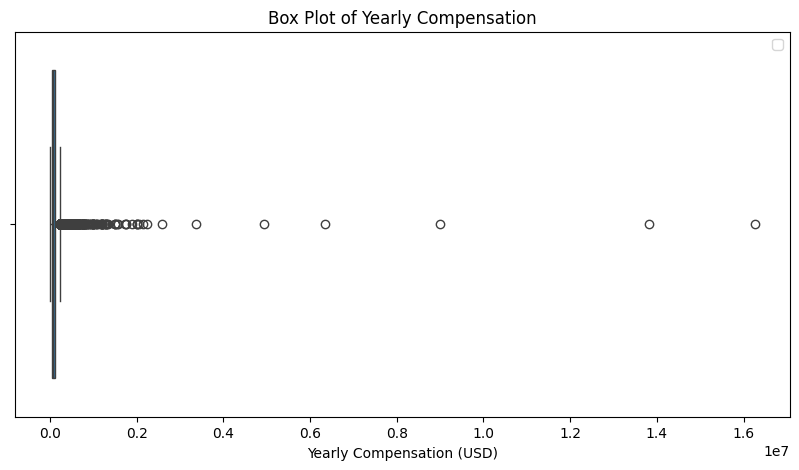

In [29]:
iqr = df['ConvertedCompYearly'].quantile(0.75) - df['ConvertedCompYearly'].quantile(0.25)
lower_bound = df['ConvertedCompYearly'].quantile(0.25) - 1.5 * iqr
upper_bound = df['ConvertedCompYearly'].quantile(0.75) + 1.5 * iqr
print(f"Lower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")
outliers_iqr = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers using IQR method: {len(outliers_iqr)}")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.legend()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


Original size: 65437
New size (no outliers): 22457
Number of outliers removed: 42980


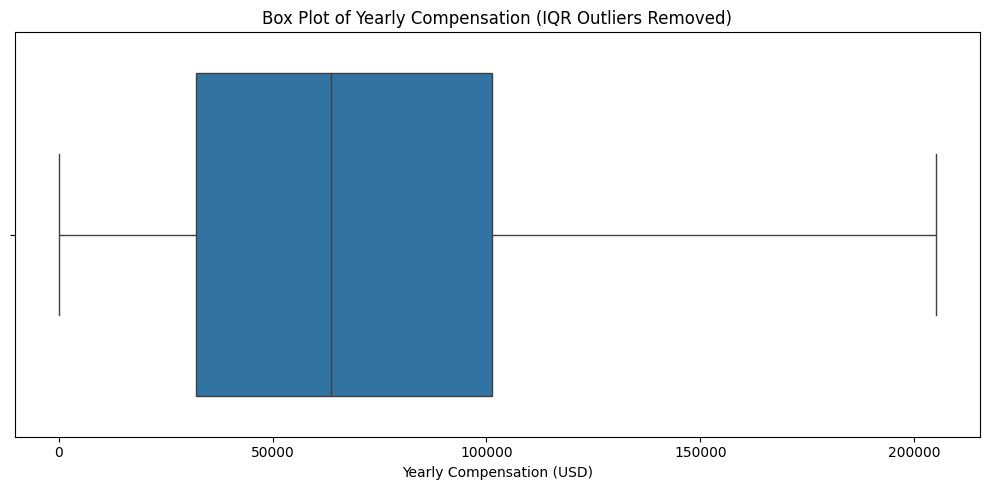

In [52]:
df_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) & 
    (df['ConvertedCompYearly'] <= upper_bound)
]
df_no_outliers = df_no_outliers[df_no_outliers['ConvertedCompYearly'].notna()]


print(f"Original size: {df.shape[0]}")
print(f"New size (no outliers): {df_no_outliers.shape[0]}")
print(f"Number of outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_no_outliers['ConvertedCompYearly'], showfliers=False)
plt.title('Box Plot of Yearly Compensation (IQR Outliers Removed)')
plt.xlabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [43]:
import numpy as np

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan
    }

df['AgeNumeric'] = df['Age'].map(age_map)

numeric_df = df.select_dtypes(include=['number']).copy()


AgeNumeric             1.000000
WorkExp                0.850655
ConvertedCompYearly    0.121512
JobSat                 0.069844
CompTotal             -0.002761
JobSatPoints_1        -0.027908
ResponseId            -0.037967
JobSatPoints_8        -0.046092
JobSatPoints_6        -0.050228
JobSatPoints_4        -0.076032
JobSatPoints_9        -0.081633
JobSatPoints_7        -0.082683
JobSatPoints_5        -0.101475
JobSatPoints_11       -0.107092
JobSatPoints_10       -0.114350
Name: AgeNumeric, dtype: float64


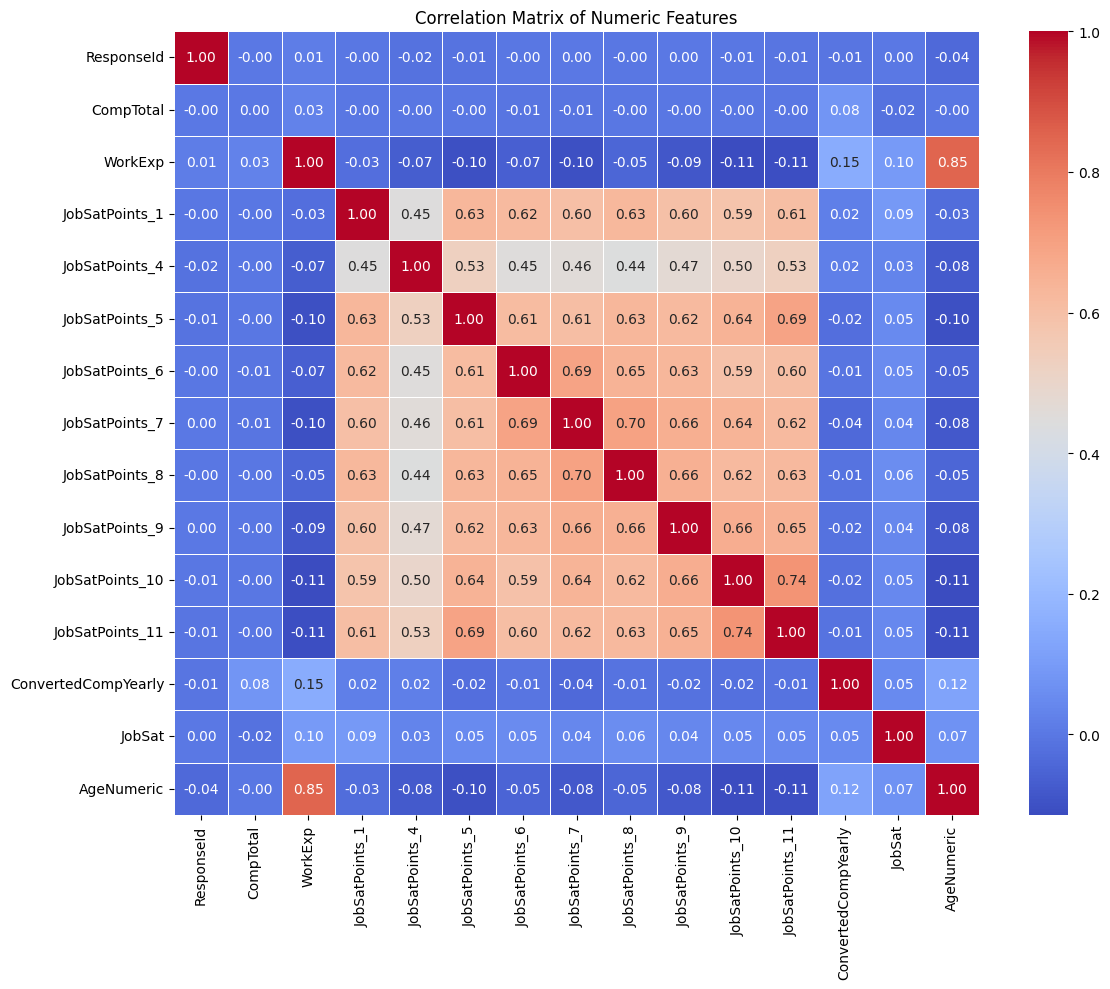

In [46]:
correlation_matrix = numeric_df.corr()
age_corr = correlation_matrix['AgeNumeric'].sort_values(ascending=False)
print(age_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
